<a href="https://colab.research.google.com/github/athiniotim/Final_Essay_Forest_Fires/blob/main/forest_fires_kathimerini_articles_sentiment_analysis_Michaela_Athinioti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 108.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [28]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [29]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [32]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
import spacy

In [34]:
nlp = spacy.load('el_core_news_sm')

In [35]:
forest_fires_kathimerini_df= pd.read_csv("/content/gdrive/MyDrive/Final Essay ΕΔΔΕ.2 Αθηνιώτη Μιχαέλα/clean csv/forest_fires_kathimerini_articles_csv.csv")

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
len(forest_fires_kathimerini_df)

648

In [38]:
forest_fires_kathimerini_df

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation
0,https://www.kathimerini.gr/world/563396869/oie...,"ΟΗΕ: Το 2024, η κλιματική αλλαγή προκάλεσε ακρ...",2024-12-30,23:42:00,Κόσμος,Newsroom,Σύμφωνα με τον Παγκόσμιο Μετεωρολογικό Οργανισ...,Η κλιματική αλλαγή προκάλεσε ακραίες μετεωρολο...,https://www.kathimerini.gr/wp-content/uploads/...,Καλιφόρνια: Προειδοποίηση στους κατοίκους να μ...
1,https://www.kathimerini.gr/life/environment/56...,NaN,NaN,NaN,NaN,NaN,NaN,Από το μικρό γαλλικό αρχιπέλαγος της Μαγιότ έω...,NaN,NaN
2,https://www.kathimerini.gr/life/environment/56...,NaN,NaN,NaN,NaN,NaN,NaN,"Δύσκολες κλιματολογικές συνθήκες, νέες προκλήσ...",NaN,NaN
3,https://www.kathimerini.gr/world/563358376/por...,Πορτογαλία και Ισπανία έζησαν τον πιο ζεστό Νο...,2024-12-05,22:11:00,Κόσμος,Newsroom,Η μέση θερμοκρασία του Νοεμβρίου στην Πορτογαλ...,Υψηλότατες για την εποχή θερμοκρασίες καταγράφ...,https://www.kathimerini.gr/wp-content/uploads/...,Shutterstock
4,https://www.kathimerini.gr/society/563356729/d...,Δύο νέες πλατφόρμες για την ανάλυση του κλίματος,2024-12-05,23:34:00,Κοινωνία,Γιάννης Ελαφρός,Δύο νέους ψηφιακούς κόμβους ανάλυσης της ατμόσ...,"Δύο νέα ισχυρά εργαλεία καταγραφής, ανάλυσης κ...",https://www.kathimerini.gr/wp-content/uploads/...,Φωτ. INTIME/ ΧΑΛΚΙΟΠΟΥΛΟΣ ΝΙΚΟΣ.
...,...,...,...,...,...,...,...,...,...,...
643,https://www.kathimerini.gr/world/562221718/kal...,Καλιφόρνια: Τουλάχιστον 14 νεκροί από τη σφοδρ...,2023-01-10,17:27:40,Κόσμος,Newsroom,«Τα θύματα είναι περισσότερα από εκείνα που σκ...,Σφοδρή βροχόπτωση αναμένεται να πλήξει και πάλ...,https://www.kathimerini.gr/wp-content/uploads/...,Φωτ. REUTERS/ Erica Urech
644,https://www.kathimerini.gr/world/562221523/cop...,Copernicus: Το 2022 ήταν το δεύτερο πιο ζεστό ...,2023-01-10,15:53:30,Κόσμος,Newsroom,«Ζούμε ήδη τις καταστροφικές συνέπειες του θερ...,Το 2022 ήταν το δεύτερο πιο ζεστό έτος που έχε...,https://www.kathimerini.gr/wp-content/uploads/...,Φωτ. AP/ Michael Probst
645,https://www.kathimerini.gr/world/562221112/vra...,Βραζιλία: Οι ρίζες της εξέγερσης των μπολσοναρ...,2023-01-10,12:24:33,Κόσμος,Δημήτρης Αθηνάκης,Τα σχέδια του προέδρου Λούλα για την προστασία...,"Στα πρώτα σχόλιά του μετά την επίθεση, ο νέος ...",https://www.kathimerini.gr/wp-content/uploads/...,Προεκλογική πινακίδα υπέρ του πρώην προέδρου τ...
646,https://www.kathimerini.gr/world/562215640/kal...,"Καλιφόρνια – Κακοκαιρία: Ένα νεκρό παιδί, χιλι...",2023-01-05,18:02:52,Κόσμος,Newsroom,Περισσότερες από 180.000 κατοικίες και επιχειρ...,Ένα παιδί σκοτώθηκε και δεκάδες χιλιάδες άνθρω...,https://www.kathimerini.gr/wp-content/uploads/...,REUTERS/Carlos Barria


In [39]:
forest_fires_kathimerini_df['old_index'] = forest_fires_kathimerini_df.index
forest_fires_kathimerini_df2 = forest_fires_kathimerini_df.dropna(subset=['date']).reset_index(drop=True)
forest_fires_kathimerini_df2

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation,old_index
0,https://www.kathimerini.gr/world/563396869/oie...,"ΟΗΕ: Το 2024, η κλιματική αλλαγή προκάλεσε ακρ...",2024-12-30,23:42:00,Κόσμος,Newsroom,Σύμφωνα με τον Παγκόσμιο Μετεωρολογικό Οργανισ...,Η κλιματική αλλαγή προκάλεσε ακραίες μετεωρολο...,https://www.kathimerini.gr/wp-content/uploads/...,Καλιφόρνια: Προειδοποίηση στους κατοίκους να μ...,0
1,https://www.kathimerini.gr/world/563358376/por...,Πορτογαλία και Ισπανία έζησαν τον πιο ζεστό Νο...,2024-12-05,22:11:00,Κόσμος,Newsroom,Η μέση θερμοκρασία του Νοεμβρίου στην Πορτογαλ...,Υψηλότατες για την εποχή θερμοκρασίες καταγράφ...,https://www.kathimerini.gr/wp-content/uploads/...,Shutterstock,3
2,https://www.kathimerini.gr/society/563356729/d...,Δύο νέες πλατφόρμες για την ανάλυση του κλίματος,2024-12-05,23:34:00,Κοινωνία,Γιάννης Ελαφρός,Δύο νέους ψηφιακούς κόμβους ανάλυσης της ατμόσ...,"Δύο νέα ισχυρά εργαλεία καταγραφής, ανάλυσης κ...",https://www.kathimerini.gr/wp-content/uploads/...,Φωτ. INTIME/ ΧΑΛΚΙΟΠΟΥΛΟΣ ΝΙΚΟΣ.,4
3,https://www.kathimerini.gr/life/science/563344...,Ερευνα: Η ατμοσφαιρική ρύπανση από τις πυρκαγι...,2024-11-28,10:32:22,Επιστήμη,Newsroom,Η έρευνα δημοσιεύτηκε στο επιστημονικό περιοδι...,Η ατμοσφαιρική ρύπανση που προκαλείται από τις...,https://www.kathimerini.gr/wp-content/uploads/...,Φωτ. AP/ Sergio Azenha,6
4,https://www.kathimerini.gr/politics/563336191/...,Φολκέρ Τουρκ στην «Κ»: «Οι πολιτικές ελίτ αδια...,2024-11-23,22:59:00,Εξωτερική Πολιτική,Βασίλης Νέδος,Οι «χαμένοι» της παγκοσμιοποίησης και η μεγάλη...,Η αδιαφορία των πολιτικών ελίτ για τους «χαμέν...,https://www.kathimerini.gr/wp-content/uploads/...,«Η κλιματική κρίση δεν είναι μακριά. Είναι εδώ...,7
...,...,...,...,...,...,...,...,...,...,...,...
570,https://www.kathimerini.gr/world/562221718/kal...,Καλιφόρνια: Τουλάχιστον 14 νεκροί από τη σφοδρ...,2023-01-10,17:27:40,Κόσμος,Newsroom,«Τα θύματα είναι περισσότερα από εκείνα που σκ...,Σφοδρή βροχόπτωση αναμένεται να πλήξει και πάλ...,https://www.kathimerini.gr/wp-content/uploads/...,Φωτ. REUTERS/ Erica Urech,643
571,https://www.kathimerini.gr/world/562221523/cop...,Copernicus: Το 2022 ήταν το δεύτερο πιο ζεστό ...,2023-01-10,15:53:30,Κόσμος,Newsroom,«Ζούμε ήδη τις καταστροφικές συνέπειες του θερ...,Το 2022 ήταν το δεύτερο πιο ζεστό έτος που έχε...,https://www.kathimerini.gr/wp-content/uploads/...,Φωτ. AP/ Michael Probst,644
572,https://www.kathimerini.gr/world/562221112/vra...,Βραζιλία: Οι ρίζες της εξέγερσης των μπολσοναρ...,2023-01-10,12:24:33,Κόσμος,Δημήτρης Αθηνάκης,Τα σχέδια του προέδρου Λούλα για την προστασία...,"Στα πρώτα σχόλιά του μετά την επίθεση, ο νέος ...",https://www.kathimerini.gr/wp-content/uploads/...,Προεκλογική πινακίδα υπέρ του πρώην προέδρου τ...,645
573,https://www.kathimerini.gr/world/562215640/kal...,"Καλιφόρνια – Κακοκαιρία: Ένα νεκρό παιδί, χιλι...",2023-01-05,18:02:52,Κόσμος,Newsroom,Περισσότερες από 180.000 κατοικίες και επιχειρ...,Ένα παιδί σκοτώθηκε και δεκάδες χιλιάδες άνθρω...,https://www.kathimerini.gr/wp-content/uploads/...,REUTERS/Carlos Barria,646


In [40]:
forest_fires_kathimerini_df2['date_dt'] = pd.to_datetime(forest_fires_kathimerini_df2['date'], format='%Y-%m-%d')
forest_fires_kathimerini_df2['time_dt'] = pd.to_datetime(forest_fires_kathimerini_df2['time'], format='%H:%M:%S')
forest_fires_kathimerini_df2.dtypes

,0
article_url,object
title,object
date,object
time,object
section,object
author,object
excerpt,object
text_body,object
feat_img_link,object
feat_img_cation,object


In [41]:
len(forest_fires_kathimerini_df2)

575

In [42]:
forest_fires_kathimerini_df2.loc[:, 'full_text'] = (
    forest_fires_kathimerini_df2['title'].fillna('') +
    ' ' +
    forest_fires_kathimerini_df2['excerpt'].fillna('') +
    ' ' +
    forest_fires_kathimerini_df2['text_body'].fillna('')
)

In [43]:
short_sa_forest_fires_kathimerini_df = forest_fires_kathimerini_df2[['date_dt', "time_dt",'full_text' ]]
short_sa_forest_fires_kathimerini_df = short_sa_forest_fires_kathimerini_df.rename(columns={'full_text': 'text'} )
short_sa_forest_fires_kathimerini_df['time_dt'] = short_sa_forest_fires_kathimerini_df['time_dt'].dt.strftime('%H:%M:%S')

In [44]:
len(short_sa_forest_fires_kathimerini_df)

575

In [45]:
short_sa_forest_fires_kathimerini_df.head()

,date_dt,time_dt,text
0,2024-12-30,23:42:00,"ΟΗΕ: Το 2024, η κλιματική αλλαγή προκάλεσε ακρ..."
1,2024-12-05,22:11:00,Πορτογαλία και Ισπανία έζησαν τον πιο ζεστό Νο...
2,2024-12-05,23:34:00,Δύο νέες πλατφόρμες για την ανάλυση του κλίματ...
3,2024-11-28,10:32:22,Ερευνα: Η ατμοσφαιρική ρύπανση από τις πυρκαγι...
4,2024-11-23,22:59:00,Φολκέρ Τουρκ στην «Κ»: «Οι πολιτικές ελίτ αδια...


In [46]:
short_sa_forest_fires_kathimerini_df.dtypes

,0
date_dt,datetime64[ns]
time_dt,object
text,object


In [47]:
short_sa_forest_fires_kathimerini_df['datetime'] = pd.to_datetime(
    short_sa_forest_fires_kathimerini_df['date_dt'].astype(str) + ' ' + short_sa_forest_fires_kathimerini_df['time_dt'],
    errors='coerce'
)

In [48]:
short_sa_forest_fires_kathimerini_df['datetime'] = pd.to_datetime(short_sa_forest_fires_kathimerini_df['datetime'], format='%Y-%m-%d %H:%M')

In [49]:
short_sa_forest_fires_kathimerini_df.dtypes

,0
date_dt,datetime64[ns]
time_dt,object
text,object
datetime,datetime64[ns]


In [50]:
# εαν θέλουμε να πετάξουμε urls που μπορεί να υπάρχουν στο κείμενο
short_sa_forest_fires_kathimerini_df['text'] = short_sa_forest_fires_kathimerini_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

In [51]:
short_sa_forest_fires_kathimerini_df.head()

,date_dt,time_dt,text,datetime
0,2024-12-30,23:42:00,"ΟΗΕ: Το 2024, η κλιματική αλλαγή προκάλεσε ακρ...",2024-12-30 23:42:00
1,2024-12-05,22:11:00,Πορτογαλία και Ισπανία έζησαν τον πιο ζεστό Νο...,2024-12-05 22:11:00
2,2024-12-05,23:34:00,Δύο νέες πλατφόρμες για την ανάλυση του κλίματ...,2024-12-05 23:34:00
3,2024-11-28,10:32:22,Ερευνα: Η ατμοσφαιρική ρύπανση από τις πυρκαγι...,2024-11-28 10:32:22
4,2024-11-23,22:59:00,Φολκέρ Τουρκ στην «Κ»: «Οι πολιτικές ελίτ αδια...,2024-11-23 22:59:00


In [52]:
emolex_df['word'].head(3)

,word
0,αφεση
1,ενορκη βεβαιωση
2,εχοντας


In [53]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [54]:
matrix = vec.fit_transform(short_sa_forest_fires_kathimerini_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
wordcount_df.shape

(575, 13161)

In [56]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [58]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
angry_words = emolex_df[emolex_df.Anger == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [59]:
trust_words

,word
8,αμην
15,γαμηλιο ταξιδι
24,διευθυντρια σχολειου
38,επικοινωνω
45,εκκλησια
...,...
13039,αληθης
13075,αναμφιβολως
13079,ανυπερβατος
13113,αναθηματικος


In [60]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
wordcount_df[trust_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
wordcount_df[trust_words].sum(axis=1)

,0
0,2
1,1
2,14
3,7
4,24
...,...
570,10
571,5
572,21
573,4


In [63]:
short_sa_forest_fires_kathimerini_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_sa_forest_fires_kathimerini_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_sa_forest_fires_kathimerini_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_sa_forest_fires_kathimerini_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_sa_forest_fires_kathimerini_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_sa_forest_fires_kathimerini_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_sa_forest_fires_kathimerini_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_sa_forest_fires_kathimerini_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_sa_forest_fires_kathimerini_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_sa_forest_fires_kathimerini_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [64]:
short_sa_forest_fires_kathimerini_df

,date_dt,time_dt,text,datetime,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2024-12-30,23:42:00,"ΟΗΕ: Το 2024, η κλιματική αλλαγή προκάλεσε ακρ...",2024-12-30 23:42:00,1,6,0,5,1,2,4,4,5,6
1,2024-12-05,22:11:00,Πορτογαλία και Ισπανία έζησαν τον πιο ζεστό Νο...,2024-12-05 22:11:00,2,2,0,1,1,1,0,0,1,0
2,2024-12-05,23:34:00,Δύο νέες πλατφόρμες για την ανάλυση του κλίματ...,2024-12-05 23:34:00,2,27,5,3,5,14,7,3,11,5
3,2024-11-28,10:32:22,Ερευνα: Η ατμοσφαιρική ρύπανση από τις πυρκαγι...,2024-11-28 10:32:22,2,11,4,7,2,7,7,3,10,3
4,2024-11-23,22:59:00,Φολκέρ Τουρκ στην «Κ»: «Οι πολιτικές ελίτ αδια...,2024-11-23 22:59:00,15,27,6,8,8,24,8,17,32,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,2023-01-10,17:27:40,Καλιφόρνια: Τουλάχιστον 14 νεκροί από τη σφοδρ...,2023-01-10 17:27:40,2,16,8,4,3,10,8,4,9,3
571,2023-01-10,15:53:30,Copernicus: Το 2022 ήταν το δεύτερο πιο ζεστό ...,2023-01-10 15:53:30,7,5,2,2,1,5,8,1,9,6
572,2023-01-10,12:24:33,Βραζιλία: Οι ρίζες της εξέγερσης των μπολσοναρ...,2023-01-10 12:24:33,16,29,9,13,13,21,16,12,30,20
573,2023-01-05,18:02:52,"Καλιφόρνια – Κακοκαιρία: Ένα νεκρό παιδί, χιλι...",2023-01-05 18:02:52,6,6,4,8,1,4,4,5,9,5


In [65]:
short_sa_forest_fires_kathimerini_df.reset_index(inplace=True)
short_sa_forest_fires_kathimerini_df.set_index('datetime', inplace=True)
short_sa_forest_fires_kathimerini_df

,index,date_dt,time_dt,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
datetime,,,,,,,,,,,,,,
2024-12-30 23:42:00,0,2024-12-30,23:42:00,"ΟΗΕ: Το 2024, η κλιματική αλλαγή προκάλεσε ακρ...",1,6,0,5,1,2,4,4,5,6
2024-12-05 22:11:00,1,2024-12-05,22:11:00,Πορτογαλία και Ισπανία έζησαν τον πιο ζεστό Νο...,2,2,0,1,1,1,0,0,1,0
2024-12-05 23:34:00,2,2024-12-05,23:34:00,Δύο νέες πλατφόρμες για την ανάλυση του κλίματ...,2,27,5,3,5,14,7,3,11,5
2024-11-28 10:32:22,3,2024-11-28,10:32:22,Ερευνα: Η ατμοσφαιρική ρύπανση από τις πυρκαγι...,2,11,4,7,2,7,7,3,10,3
2024-11-23 22:59:00,4,2024-11-23,22:59:00,Φολκέρ Τουρκ στην «Κ»: «Οι πολιτικές ελίτ αδια...,15,27,6,8,8,24,8,17,32,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10 17:27:40,570,2023-01-10,17:27:40,Καλιφόρνια: Τουλάχιστον 14 νεκροί από τη σφοδρ...,2,16,8,4,3,10,8,4,9,3
2023-01-10 15:53:30,571,2023-01-10,15:53:30,Copernicus: Το 2022 ήταν το δεύτερο πιο ζεστό ...,7,5,2,2,1,5,8,1,9,6
2023-01-10 12:24:33,572,2023-01-10,12:24:33,Βραζιλία: Οι ρίζες της εξέγερσης των μπολσοναρ...,16,29,9,13,13,21,16,12,30,20


<Axes: xlabel='datetime'>

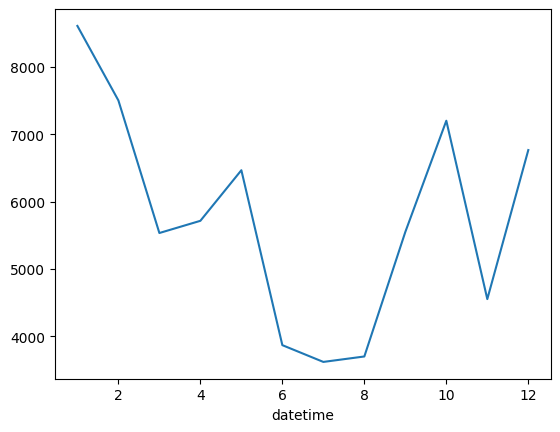

In [66]:
short_sa_forest_fires_kathimerini_df['text'].str.len().groupby(by=short_sa_forest_fires_kathimerini_df.index.month).mean().plot()

<Axes: xlabel='datetime'>

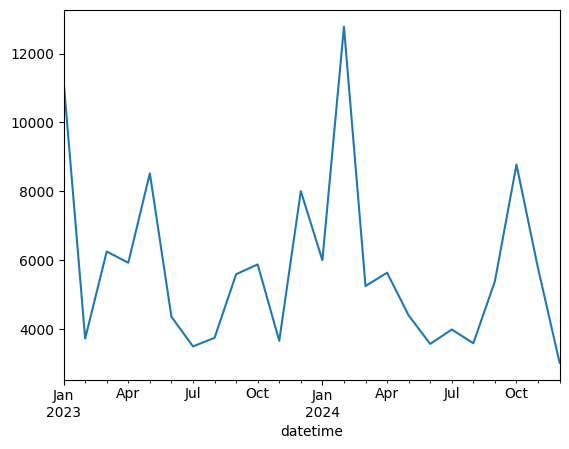

In [67]:
short_sa_forest_fires_kathimerini_df['text'].str.len().resample('ME').mean().plot()

<Axes: ylabel='datetime'>

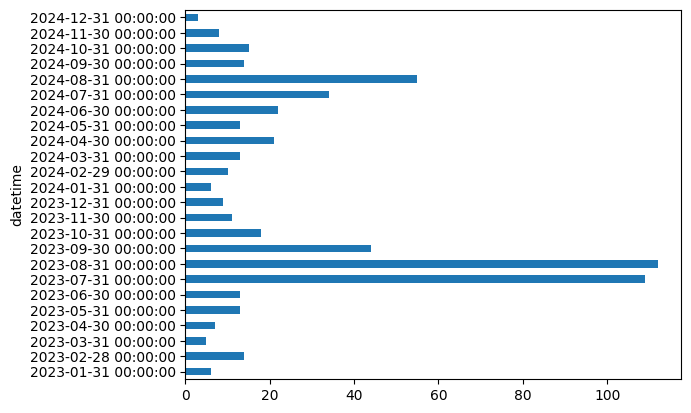

In [68]:
short_sa_forest_fires_kathimerini_df['text'].resample('ME').count().plot(kind='barh')

<Axes: xlabel='datetime'>

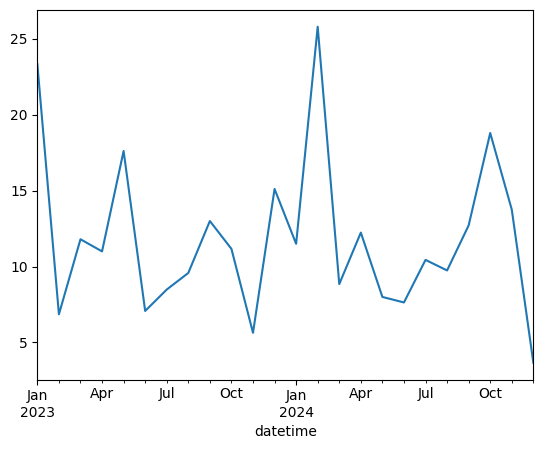

In [69]:
short_sa_forest_fires_kathimerini_df['fear'].resample('ME').mean().plot()

<Axes: xlabel='datetime'>

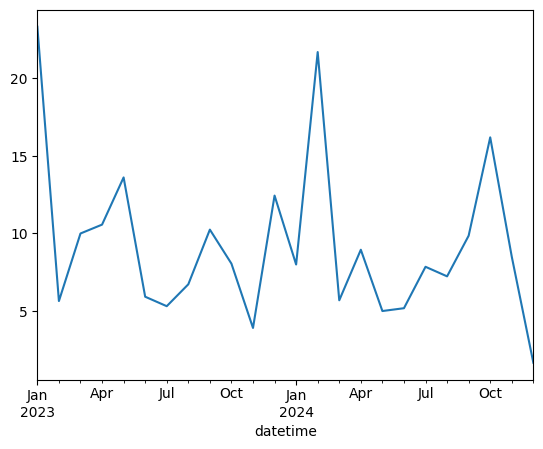

In [70]:
short_sa_forest_fires_kathimerini_df['anger'].resample('ME').mean().plot()

In [71]:
short_sa_forest_fires_kathimerini_df.sort_index().head(10)

,index,date_dt,time_dt,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
datetime,,,,,,,,,,,,,,
2023-01-02 22:47:10,574,2023-01-02,22:47:10,Ισπανία: Το 2022 ήταν η θερμότερη χρονιά που έ...,1,4,0,4,3,2,1,3,5,2
2023-01-05 18:02:52,573,2023-01-05,18:02:52,"Καλιφόρνια – Κακοκαιρία: Ένα νεκρό παιδί, χιλι...",6,6,4,8,1,4,4,5,9,5
2023-01-10 12:24:33,572,2023-01-10,12:24:33,Βραζιλία: Οι ρίζες της εξέγερσης των μπολσοναρ...,16,29,9,13,13,21,16,12,30,20
2023-01-10 15:53:30,571,2023-01-10,15:53:30,Copernicus: Το 2022 ήταν το δεύτερο πιο ζεστό ...,7,5,2,2,1,5,8,1,9,6
2023-01-10 17:27:40,570,2023-01-10,17:27:40,Καλιφόρνια: Τουλάχιστον 14 νεκροί από τη σφοδρ...,2,16,8,4,3,10,8,4,9,3
2023-01-15 17:01:32,569,2023-01-15,17:01:32,Κυριάκος Μητσοτάκης: Οι πολίτες θα μας εμπιστε...,108,214,66,111,52,204,95,62,222,104
2023-02-01 14:42:56,568,2023-02-01,14:42:56,Μάτι: Στο Πάρκο Μνήμης Κυριάκος Μητσοτάκης και...,6,30,8,3,7,16,17,3,12,5
2023-02-03 22:21:59,567,2023-02-03,22:21:59,Χιλή: Τέσσερις νεκροί και μεγάλες καταστροφές ...,1,7,4,4,2,6,5,2,5,4
2023-02-04 19:40:44,566,2023-02-04,19:40:44,Χιλή: Δεκάδες νεκροί και εκατοντάδες τραυματίε...,2,3,0,1,1,1,0,1,4,2


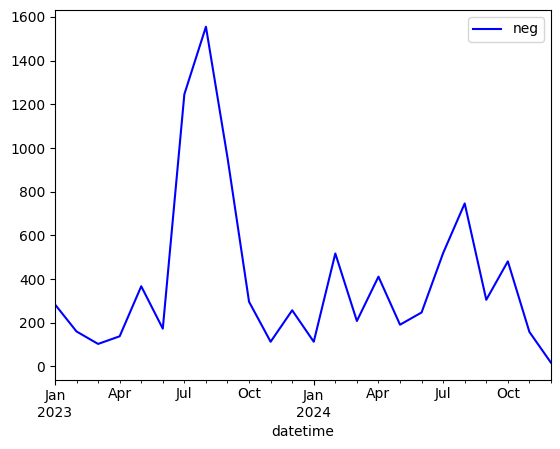

In [72]:
short_sa_forest_fires_kathimerini_df['negative'].resample('ME').sum().plot(color = 'b',label = 'neg').legend()

<ipython-input-73-3961472406>:1: FutureWarning: 'Me' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_sa_forest_fires_kathimerini_df['anger'].resample('Me').sum().plot(figsize=(16,4))


<Axes: xlabel='datetime'>

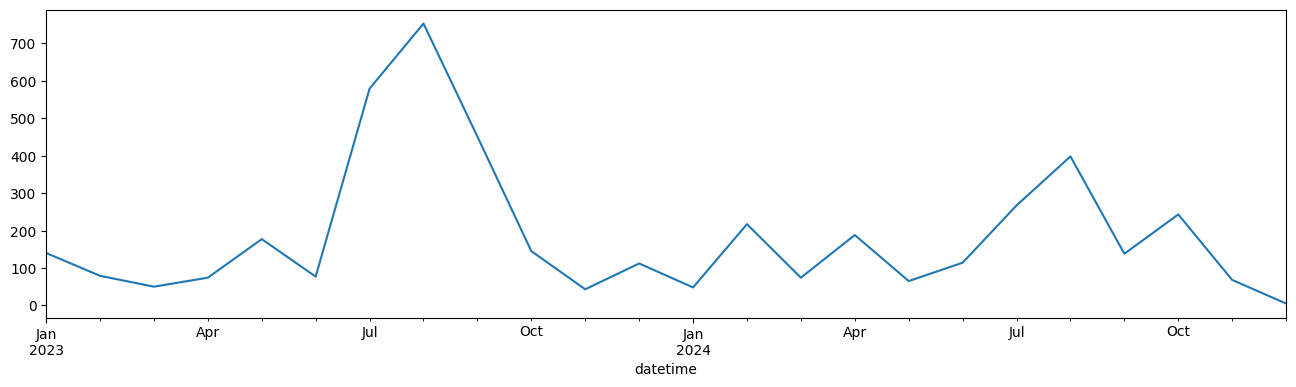

In [73]:
short_sa_forest_fires_kathimerini_df['anger'].resample('Me').sum().plot(figsize=(16,4))

<ipython-input-74-2898755944>:1: FutureWarning: 'Me' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_sa_forest_fires_kathimerini_df['fear'].resample('Me').sum().plot(figsize=(16,4))


<Axes: xlabel='datetime'>

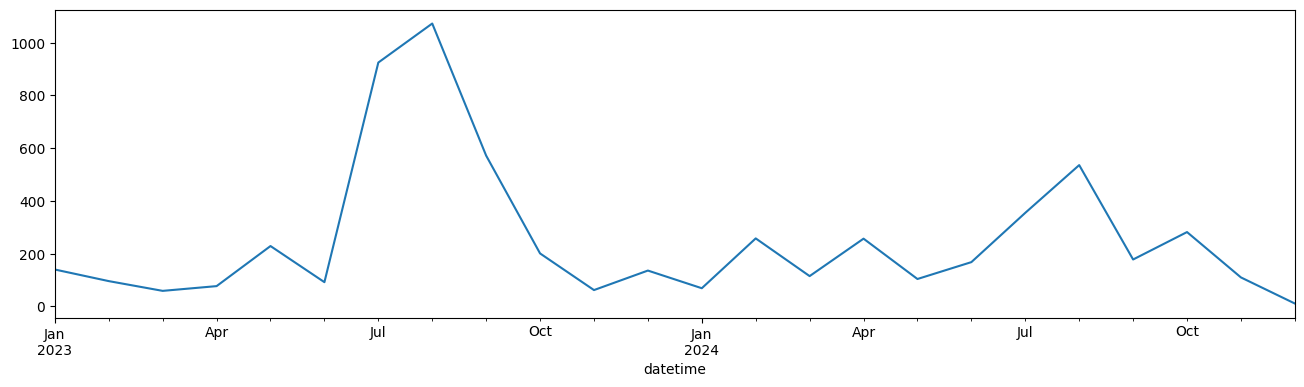

In [74]:
short_sa_forest_fires_kathimerini_df['fear'].resample('Me').sum().plot(figsize=(16,4))

<Axes: xlabel='datetime'>

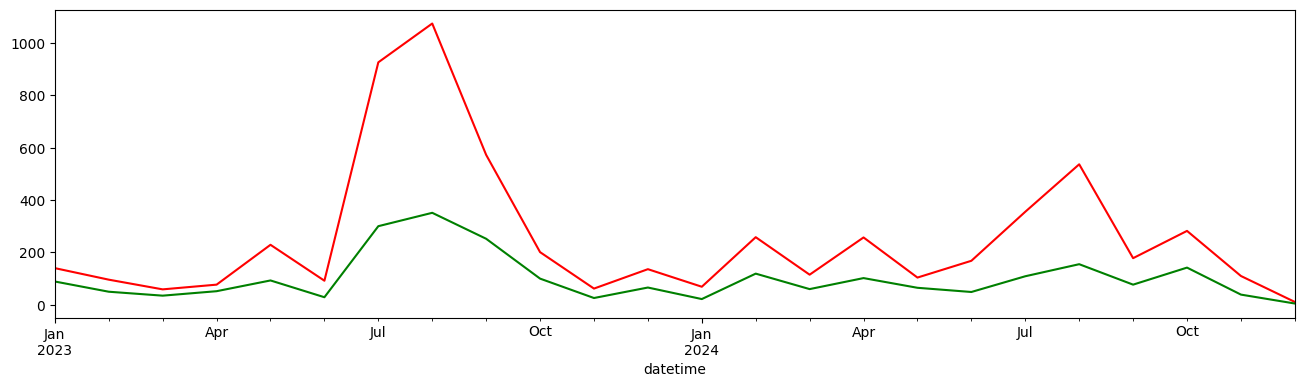

In [75]:
ax = short_sa_forest_fires_kathimerini_df['fear'].resample('ME').sum().plot(figsize=(16,4), color = 'red')
short_sa_forest_fires_kathimerini_df['joy'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='datetime'>

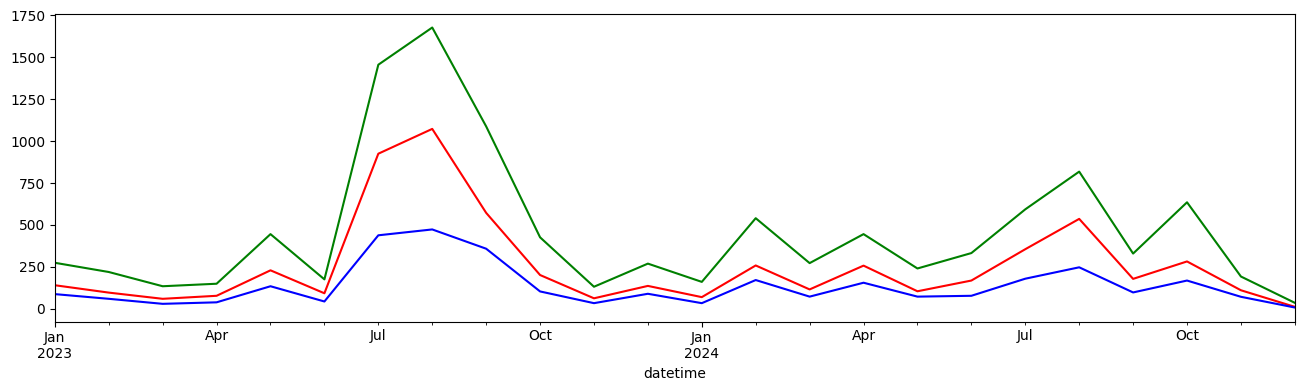

In [76]:
ax = short_sa_forest_fires_kathimerini_df['fear'].resample('ME').sum().plot(figsize=(16,4), color = 'red')
short_sa_forest_fires_kathimerini_df['positive'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_sa_forest_fires_kathimerini_df['sadness'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [77]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [78]:
# plt.style.use('classic')
#plt.style.use('ggplot')
# plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

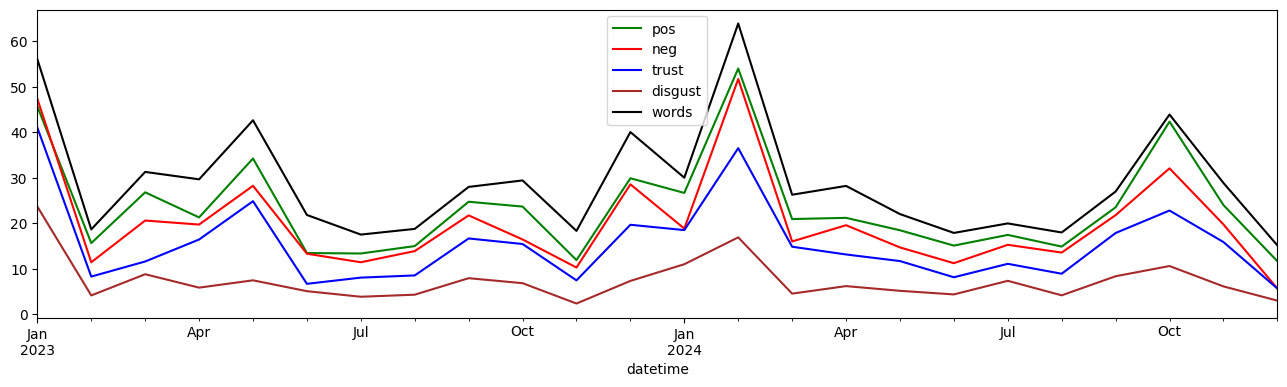

In [79]:
ax = short_sa_forest_fires_kathimerini_df['positive'].resample('ME').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_sa_forest_fires_kathimerini_df['negative'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_sa_forest_fires_kathimerini_df['trust'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_sa_forest_fires_kathimerini_df['disgust'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_sa_forest_fires_kathimerini_df['text'].str.len().resample('ME').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<Axes: xlabel='datetime'>

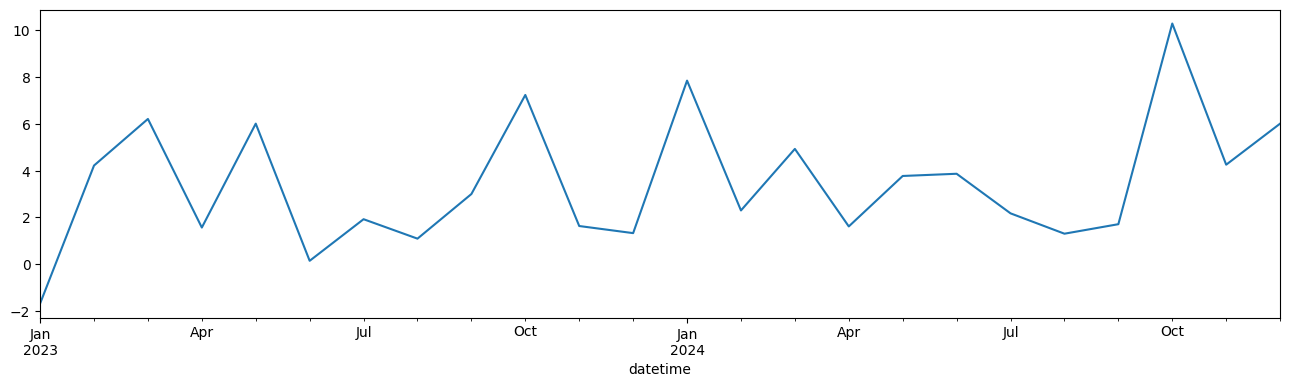

In [80]:
short_sa_forest_fires_kathimerini_df['pos/neg'] = short_sa_forest_fires_kathimerini_df['positive'] - short_sa_forest_fires_kathimerini_df['negative']
short_sa_forest_fires_kathimerini_df['pos/neg'].resample('ME').mean().plot(figsize=(16,4))

<Axes: xlabel='datetime'>

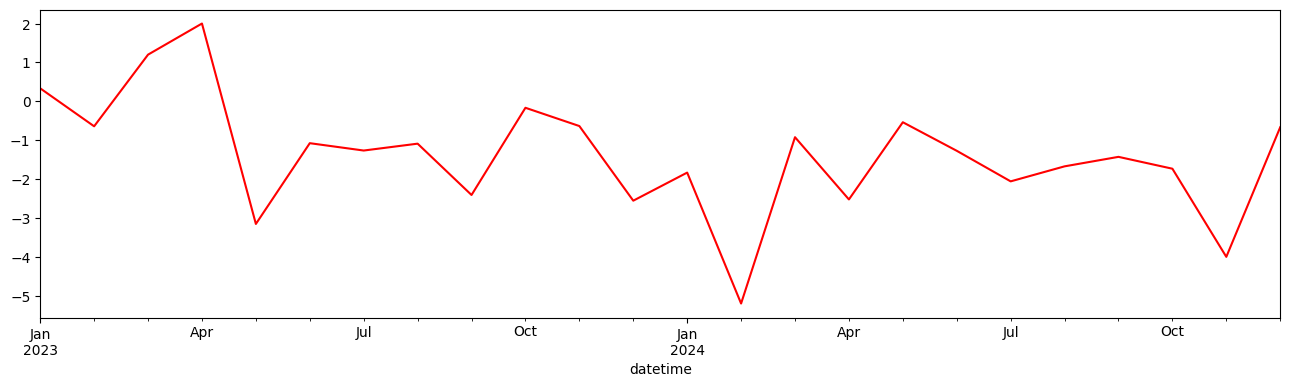

In [81]:
short_sa_forest_fires_kathimerini_df['joy/sadness'] = short_sa_forest_fires_kathimerini_df['joy'] - short_sa_forest_fires_kathimerini_df['sadness']
short_sa_forest_fires_kathimerini_df['joy/sadness'].resample('ME').mean().plot(figsize=(16,4), color = 'red')

In [82]:
#plt.style.use('grayscale')
# plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='datetime'>

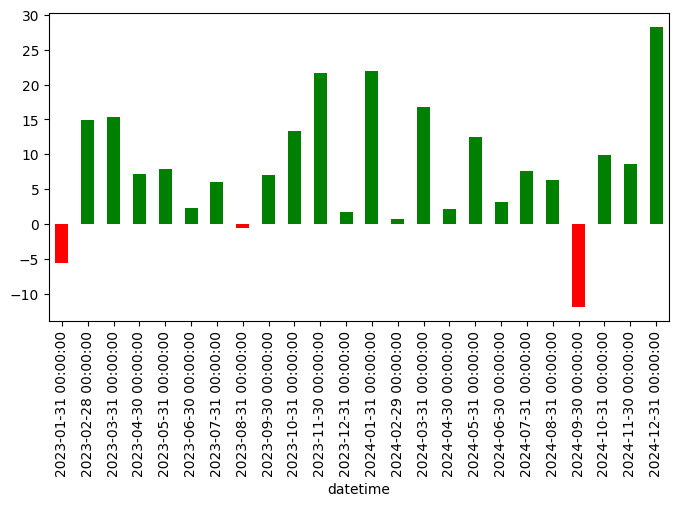

In [83]:
short_sa_forest_fires_kathimerini_df['(-)αρνητικότητα | θετικότητα(+)'] = short_sa_forest_fires_kathimerini_df.positive*100//short_sa_forest_fires_kathimerini_df[['positive','negative']].sum(
        axis=1) - short_sa_forest_fires_kathimerini_df.negative*100//short_sa_forest_fires_kathimerini_df[['positive','negative']].sum(axis=1)

short_sa_forest_fires_kathimerini_df['(-)αρνητικότητα | θετικότητα(+)'].resample('ME').mean().plot(kind='bar',
                                                                               color=(short_sa_forest_fires_kathimerini_df['(-)αρνητικότητα | θετικότητα(+)'].resample('ME').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [84]:
short_sa_forest_fires_kathimerini_df[(short_sa_forest_fires_kathimerini_df['(-)αρνητικότητα | θετικότητα(+)'] == short_sa_forest_fires_kathimerini_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_sa_forest_fires_kathimerini_df['(-)αρνητικότητα | θετικότητα(+)'] == short_sa_forest_fires_kathimerini_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
datetime,,,,
2024-09-21 19:07:48,32,0,3,-100.0
2024-09-14 21:11:00,35,0,4,-100.0
2024-08-17 20:44:00,54,3,0,100.0
2024-08-12 13:38:55,82,3,0,100.0
2024-07-09 12:13:34,111,5,0,100.0
2024-06-17 20:31:43,142,0,3,-100.0
2024-05-30 08:30:00,154,1,0,100.0
2023-11-29 08:07:11,222,3,0,100.0
2023-09-13 13:36:00,266,5,0,100.0


In [85]:
forest_fires_kathimerini_df2.loc[[32,54], ['article_url','title', 'full_text']]

,article_url,title,full_text
32,https://www.kathimerini.gr/society/563233159/s...,Συνολικά 30 δασικές πυρκαγιές στη χώρα το τελε...,Συνολικά 30 δασικές πυρκαγιές στη χώρα το τελε...
54,https://www.kathimerini.gr/society/563177854/p...,Πυροσβεστική: 49 πυρκαγιές το τελευταίο 24ωρο ...,Πυροσβεστική: 49 πυρκαγιές το τελευταίο 24ωρο ...


### Συναισθηματικά δίπολα

Όπως με το polarity που προκύπτει από το ζεύγος positivity/negativity, έτσι και τα 8 βασικά συναισθήματα κατηγοριοποιούνται σε 4 συναισθηματικά δίπολα:
- χαρά/λύπη,
- εμπιστοσύνη/αποστροφή,
- φόβος/θυμός,
- έκπληξη/προσμονή

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Plutchik-wheel.svg/800px-Plutchik-wheel.svg.png)

Εικόνα: Ο τροχός του Plutchik

Για την κατηγοριοποίηση των συναισθημάτων:
[Emotional classification](https://en.wikipedia.org/wiki/Emotion_classification)